KeyboardInterrupt: 

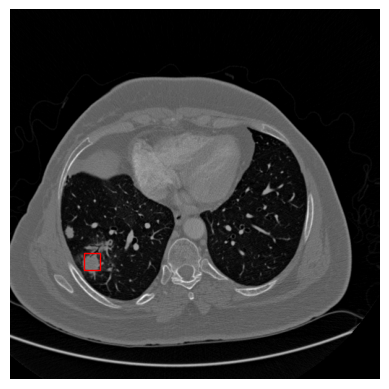

In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

def show_nodules(ct_scan, nodules, Origin, Spacing, seriesuid, output_folder):
    for idx, nodule in enumerate(nodules):
        # 取得結節的座標與直徑
        x, y, z, diameter = nodule

        # 將世界座標轉換為影像座標
        x = int((x - Origin[0]) / Spacing[0])
        y = int((y - Origin[1]) / Spacing[1])
        z = int((z - Origin[2]) / Spacing[2])

        # 計算切片上結節的邊長，與直徑成正比
        side_length = int(diameter / Spacing[0])

        # 取得對應的影像切片
        data = ct_scan[z].copy()

        fig, ax = plt.subplots()
        ax.imshow(data, cmap="gray")
        
        # 繪製紅色矩形框來標記結節
        rect = plt.Rectangle((x - side_length / 2, y - side_length / 2), 
                             side_length, side_length, 
                             linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        plt.axis('off')

        # 儲存影像
        output_filename = os.path.join(output_folder, f"{seriesuid}_nodule_{idx}_slice_{z}.png")
        plt.savefig(output_filename, bbox_inches='tight', pad_inches=0)
        plt.close(fig)

def read_mhd_and_show_nodules(folder_path, csv_file, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    nodules_info = pd.read_csv(csv_file)
    for filename in os.listdir(folder_path):
        if filename.endswith(".mhd"):
            seriesuid = os.path.splitext(filename)[0]
            file_path = os.path.join(folder_path, filename)
            itkimage = sitk.ReadImage(file_path)
            numpyimage = sitk.GetArrayFromImage(itkimage)
            Origin = itkimage.GetOrigin()
            Spacing = itkimage.GetSpacing()

            current_nodules = nodules_info[nodules_info["seriesuid"] == seriesuid][["coordX", "coordY", "coordZ", "diameter_mm"]].values
            show_nodules(numpyimage, current_nodules, Origin, Spacing, seriesuid, output_folder)

# 設定資料路徑與輸出路徑
folder_path = r'luna_dataset\subset0'
csv_file = r'luna_dataset\annotations.csv'
output_folder = r'luna_dataset\visual_luna'

# 執行函數
read_mhd_and_show_nodules(folder_path, csv_file, output_folder)
